# Final project

For this project I made a complex number plotter that uses Sympy as a backend for any functions I'd want to graph. I've always wanted an easy way to graph stuff on the complex plane (especially in a reusable way) and this project is a good start.

**Instructions on running the project:** 

pip install notebook

pip install sympy

**Then in the project directory:**

jupyter notebook

In [48]:
import math
import cmath
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [49]:
x, t, z, s, a, b, c = symbols('x, t, z, s, a, b, c')
k, m, n = symbols('k m n', integer=True)
# f, g, h = symbols('f g h', cls=Function)
init_printing(fontsize='200pt', use_latex='mathjax')

In [50]:
testIntegral = Integral(sqrt(1/x),x)
display(testIntegral)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           

In [51]:
testSum = Sum(1/k, (k, 1, oo))
display(testSum)

  ∞    
 ____  
 ╲     
  ╲    
   ╲  1
   ╱  ─
  ╱   k
 ╱     
 ‾‾‾‾  
k = 1  

In [52]:
# This function outputs n-th roots of unity raised to arbitrary powers
# These will be the building blocks of many other functions 
def rootOfUnityPower(numerator: int, denominator: int) -> Symbol:
    return exp((2 * pi * I * numerator) / denominator)

rootOfUnityPower(1,7)

 2⋅ⅈ⋅π
 ─────
   7  
ℯ     

In [53]:
rootOfUnityZetaSeries = Sum(rootOfUnityPower(n,b) / (n ** s), (n, 1, oo))
display(rootOfUnityZetaSeries)
display(rootOfUnityZetaSeries.subs({s:2,b:3}))
display(rootOfUnityZetaSeries.evalf(subs={s:2,b:3}))

  ∞               
 ____             
 ╲                
  ╲        2⋅ⅈ⋅π⋅n
   ╲       ───────
   ╱   -s     b   
  ╱   n  ⋅ℯ       
 ╱                
 ‾‾‾‾             
n = 1             

  ∞            
______         
╲              
 ╲             
  ╲     2⋅ⅈ⋅π⋅n
   ╲    ───────
    ╲      3   
    ╱  ℯ       
   ╱   ────────
  ╱        2   
 ╱        n    
╱              
‾‾‾‾‾‾         
n = 1          

-0.54805 + 0.6765⋅ⅈ

In [54]:
def rootOfUnityZetaFunction(nthRootOfUnity : int, rotationalOffset : int, sValue : complex) -> Symbol:
    effectiveOffset = rotationalOffset % nthRootOfUnity    
    return rootOfUnityPower(n + effectiveOffset, nthRootOfUnity) / (n ** sValue)

rootOfUnityZetaFunction(5, 0, 3)

 2⋅ⅈ⋅π⋅n
 ───────
    5   
ℯ       
────────
    3   
   n    

In [55]:
display(Sum(1/n**2, (n, 1, oo)))
display(Sum(1/n**2, (n, 1, oo)).doit())
display(Sum(1/n**3, (n, 1, oo)))
display(Sum(1/n**3, (n, 1, oo)).doit())
display(Sum(1/n**4, (n, 1, oo)))
display(Sum(1/n**4, (n, 1, oo)).doit())

  ∞     
 ____   
 ╲      
  ╲   1 
   ╲  ──
   ╱   2
  ╱   n 
 ╱      
 ‾‾‾‾   
n = 1   

 2
π 
──
6 

  ∞     
 ____   
 ╲      
  ╲   1 
   ╲  ──
   ╱   3
  ╱   n 
 ╱      
 ‾‾‾‾   
n = 1   

ζ(3)

  ∞     
 ____   
 ╲      
  ╲   1 
   ╲  ──
   ╱   4
  ╱   n 
 ╱      
 ‾‾‾‾   
n = 1   

 4
π 
──
90

In [56]:
polylogarithm = Sum(z**n /n**s, (n, 1, oo))
display(polylogarithm)
display(polylogarithm.evalf(subs={s:2,z:1}, n=20))
display(polylogarithm.subs({s:2,z:1}).doit())

  ∞         
 ___        
 ╲          
  ╲    -s  n
  ╱   n  ⋅z 
 ╱          
 ‾‾‾        
n = 1       

1.6449340668482264365

 2
π 
──
6 

##### **Evaluating series using sequences**
Constructing series as sequences rather than entire formulas allows for a finer control over how the series is calculated and displayed.
By first creating a sequence of a function and then evaluating the series term by term it makes it much easier to take partial sums or plot values at particular points.



In [57]:
def sequenceBuilder(sympyFunc : Function ,startIndex : int, endIndex : int) -> SeqFormula:
    # I don't like the normal syntax so this function just wraps the base sequence function          
    return sequence(sympyFunc, (n, startIndex, endIndex))

In [58]:
rootOfUnityHarmonic = rootOfUnityPower(n, 1) / n
rootOfUnityHarmonicSequence = sequenceBuilder(rootOfUnityHarmonic, 1, 10)
display(rootOfUnityHarmonicSequence)

[1, 1/2, 1/3, 1/4, …]

In [59]:
def partialSumSequence(inputSequence : SeqFormula):
    outputSequence = []
    partialSum = 0    
    for i in range(0, inputSequence.length):
        partialSum += inputSequence[i]
        outputSequence.append(partialSum)
    return outputSequence     

output = partialSumSequence(rootOfUnityHarmonicSequence)
display(output)
display(output[rootOfUnityHarmonicSequence.length - 1].evalf())

⎡              25  137  49  363  761  7129  7381⎤
⎢1, 3/2, 11/6, ──, ───, ──, ───, ───, ────, ────⎥
⎣              12   60  20  140  280  2520  2520⎦

2.92896825396825

In [60]:
# This method adds together a sequence of values and then evaluates it to an arbitray precision
def evaluateSum(inputSeq : SeqFormula, precision : int):    
    return N(summation(inputSeq.formula, (n, inputSeq.interval.left, inputSeq.interval.right)), precision)

display(evaluateSum(rootOfUnityHarmonicSequence,15))

2.92896825396825

In [61]:
# Comparing ways to sum a series
sumVersion = Sum(rootOfUnityZetaFunction(3, 0, 3), (n, 1, 1000))
display(sumVersion)

# Using sequences
z1 = rootOfUnityZetaFunction(3,0, 3)
zs1 = sequenceBuilder(z1, 1, 1000)
display(evaluateSum(zs1,15))

# Using Sum objects
display(sumVersion.evalf(n=15))


 1000          
______         
╲              
 ╲             
  ╲     2⋅ⅈ⋅π⋅n
   ╲    ───────
    ╲      3   
    ╱  ℯ       
   ╱   ────────
  ╱        3   
 ╱        n    
╱              
‾‾‾‾‾‾         
n = 1          

-0.534247512514876 + 0.765587079102405⋅ⅈ

-0.534247512514876 + 0.765587079102405⋅ⅈ

In [62]:
# This function plots sequences tip to tail in the complex plane
# Should be passed a partial sum
def complexPlotPartialSum(inputSequence : SeqFormula):    
    listVersion = list(inputSequence)    
    lastX = 0
    lastY = 0
    for i in range(0, len(listVersion)):
        realComp = complex(inputSequence[i]).real
        imagComp = complex(inputSequence[i]).imag
        plt.plot([lastX, realComp], [lastY, imagComp])  
        lastX = realComp
        lastY = imagComp

    plt.axis('square')
    plt.show()    

In [67]:
# This function plots sequences tip to tail in the complex plane
# Should be passed a partial sum
def complexPlotSequence(inputSequence : SeqFormula):    
    listVersion = list(inputSequence)   
    for i in range(0, len(listVersion)):
        realComp = complex(inputSequence[i]).real
        imagComp = complex(inputSequence[i]).imag
        plt.plot([0, realComp], [0, imagComp])  
        

    plt.axis('square')
    plt.show()    

 1000         
_____         
╲             
 ╲     2⋅ⅈ⋅π⋅n
  ╲    ───────
   ╲      25  
   ╱  ℯ       
  ╱   ────────
 ╱       n    
╱             
‾‾‾‾‾         
n = 1         

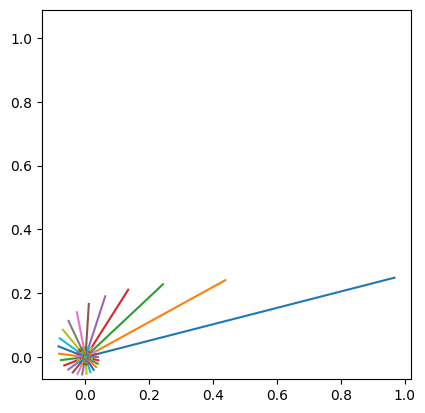

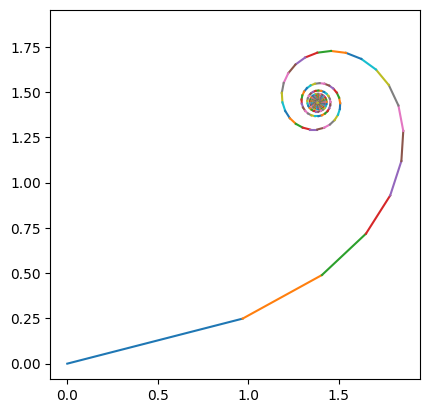

1.38411612620142 + 1.44117483906368⋅ⅈ

In [72]:
rootOfUnity = 25
sValue = 1
offset = 0
numTerms = 1000

# I might try to make a plotter that only asks for a function as input
functionToPlot = rootOfUnityZetaFunction(rootOfUnity, offset, sValue)
display(Sum(functionToPlot, (n, 1, numTerms)))
functionSequence = sequenceBuilder(functionToPlot, 1, numTerms)

# Plot of the sequence
complexPlotSequence(functionSequence) 

# Plot of the partial sums
complexPlotPartialSum(partialSumSequence(functionSequence))

display(evaluateSum(functionSequence,15))